NAME: GOKUL J

REG.NO: 212222230038



In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
single_image= X_train[9]

In [ ]:
single_image.shape

(28, 28)

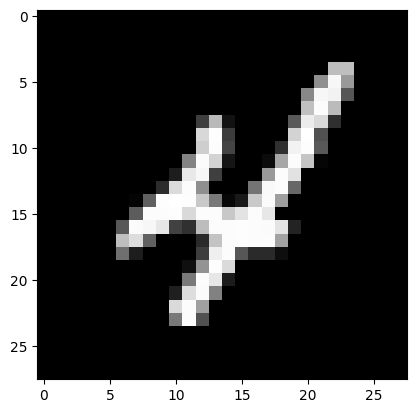

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()


0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[9]

4

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

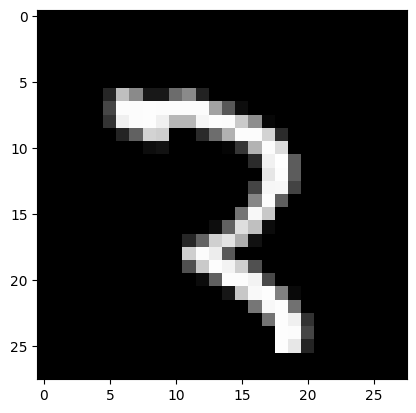

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name: Gokul J

Register Number: 212222230038

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 69ms/step - accuracy: 0.8800 - loss: 0.3982 - val_accuracy: 0.9797 - val_loss: 0.0620
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9812 - loss: 0.0614 - val_accuracy: 0.9824 - val_loss: 0.0530
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 66ms/step - accuracy: 0.9880 - loss: 0.0395 - val_accuracy: 0.9860 - val_loss: 0.0442
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.9918 - loss: 0.0279 - val_accuracy: 0.9874 - val_loss: 0.0379
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.9929 - loss: 0.0216 - val_accuracy: 0.9871 - val_loss: 0.0408


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
print("Gokul J" "\n" " 212222230038")
metrics.head()

Gokul J
 212222230038


,accuracy,loss,val_accuracy,val_loss
0,0.945633,0.181546,0.9797,0.062031
1,0.983350,0.054979,0.9824,0.052985
2,0.988100,0.038240,0.9860,0.044186
3,0.990933,0.030134,0.9874,0.037872
4,0.992333,0.023366,0.9871,0.040850


Gokul J
 212222230038


<Axes: >

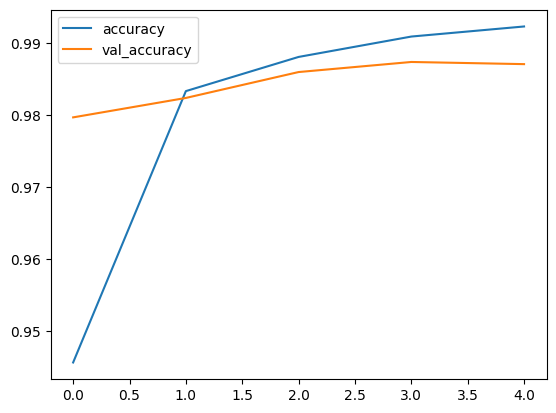

In [ ]:
print("Gokul J" "\n" " 212222230038")
metrics[['accuracy','val_accuracy']].plot()

Gokul J
 212222230038


<Axes: >

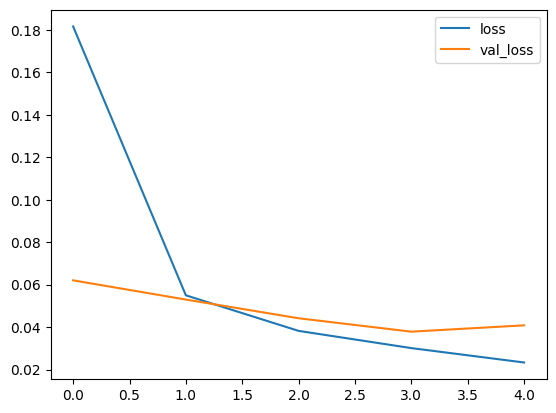

In [ ]:
print("Gokul J" "\n" " 212222230038")
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
print("Gokul J" "\n" " 212222230038")
print(confusion_matrix(y_test,x_test_predictions))

Gokul J
 212222230038
[[ 977    0    0    0    0    0    2    1    0    0]
 [   0 1124    2    0    0    1    6    1    1    0]
 [   3    2 1017    3    1    0    0    6    0    0]
 [   0    0    2 1002    0    2    0    3    1    0]
 [   0    0    0    0  975    0    1    0    1    5]
 [   2    0    0   11    0  876    3    0    0    0]
 [   5    1    0    0    4    1  945    0    2    0]
 [   0    6    7    1    1    0    0 1006    3    4]
 [   3    0    1    1    0    1    0    3  959    6]
 [   1    1    0    1   10    5    0    0    1  990]]


In [ ]:
print("Gokul J" "\n" " 212222230038")
print(classification_report(y_test,x_test_predictions))

Gokul J
 212222230038
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('/content/Fourr.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('Fourr.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1 )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [ ]:
print(x_single_prediction)

[5]


Gokul J
 212222230038


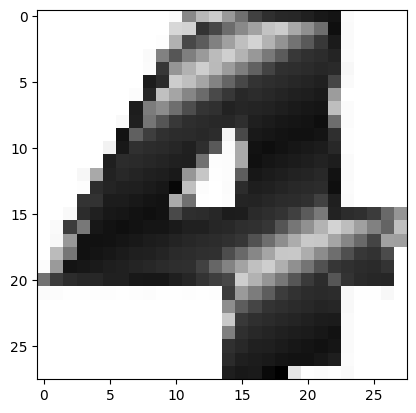

In [ ]:
print("Gokul J" "\n" " 212222230038")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
print(x_single_prediction)

[4]
